# Важно!

Придерживайтесь эталонного вывода в коде каждого задания, чтобы избежать расхождений в трактовках условий задания.

In [1]:
# загрузим библиотеки
import numpy as np
import pandas as pd

## Задание 1

Создайте массив массив из 100 элементов (от 1 до 100), переформатируйте в формат (10 * 10), сделайте слайсинг с шагом 2 по каждой оси.

In [16]:
arr = np.array(range(1, 101)) # массив от 1 до 100
arr = arr.reshape((10, 10)) # форматирование в 10*10
arr[::2, ::2] # слайсин с шагом 2 по каждой оси

array([[ 1,  3,  5,  7,  9],
       [21, 23, 25, 27, 29],
       [41, 43, 45, 47, 49],
       [61, 63, 65, 67, 69],
       [81, 83, 85, 87, 89]])

## Задание 2

Написать функцию, которая по заданной длине последовательности находит среднее арифметическое ее членов. (Для соответсвия примеру вывода используйте длину length = 100_000_000)

Реализуйте задачу с и без помощи numpy, сравните время выполнения

Используйте выражение 


`%%time` 

в первой строчке ячейки кода для отображения времени выполнения ячейки

Если возникамют ошибки с %%time - используйте код

`
from datetime import datetime
start_time = datetime.now()
---ваш код---
print(datetime.now() - start_time)
`

In [19]:
# решение с использованием numpy
from datetime import datetime

start_time = datetime.now()
# зададим длину нашей последовательности

length = int(input())
arr = np.arange(0, length)
summa = np.mean(arr)
print(summa)
print(datetime.now() - start_time)

100000000
49999999.5
0:00:04.283970


In [27]:
from datetime import datetime

start_time = datetime.now()
# решение без использования numpy

x = int(input()) # длина последовательности

# чесное решение
summa = 0
for i in range(x):
    summa += i
print(summa / x)
print(datetime.now() - start_time)

# нечесное решение
start_time = datetime.now()
Sn = x*(x-1)/2 # сумма арифм. прогрессии
print(Sn / x)
print(datetime.now() - start_time)





100000000
49999999.5
0:00:22.512025
49999999.5
0:00:00


Если все сделано верно, то можно заметить, что у нампай скорость выполнения (total: 546 ms) заметно выше питона (total: 16.2 s)

## Задание 3

Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5

Изначальный код:

`
r = np.random.RandomState(1)
s=pd.Series(r.uniform(0, 10, 100))
`

In [32]:


r = np.random.RandomState(1) # задано изначально
s=pd.Series(r.uniform(0, 10, 100)) # генерируем один и тот же список
s = s.sort_values() # сортируем
print(s[s>5].index[0]) # берем 0 индекс в s, где s>5


67


## Задание 4

Предположим, что мы наблюдаем за некоторым признаком нашего датасета, но в данных есть пропуски. Ваша задача: реализовать алгоритм заполнения пропущенных значений последним известным с помощью средств python и pandas. (подсказка: вам может помочь функция np.isnan(), которая возвращает True, если число - nan. Для реализации с пандас стоит посмотреть на метод .fillna).

Изначальный код с инициализацией такого датасета предоставлен. Важно! Графики решений других слушателей могут незначительно отличаться из-за генерации случайных пропусков.


```

# импортируем библиотеку для создания шума
import random
# библиотека для визуализации
import matplotlib.pyplot as plt

# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None

# ваш код тут
# список а содержит пропуски, его надо восстановить

# ВАШ КОД ТУТ

# отобразим
plt.plot(a)

```

Реализация используя python

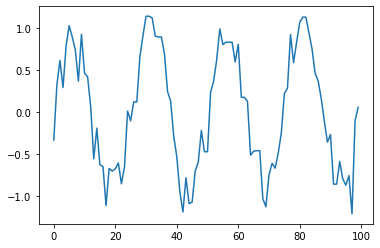

In [6]:
# импортируем библиотеку для создания шума
import random
# библиотека для визуализации
import matplotlib.pyplot as plt

# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None

for j in range(len(a)): #пробегаем по массиву
    try:
        if np.isnan(a[j]): #если элемент а[j] возвращает тру, то меняем на предидущий
            a[j] = a[j-1]
    except Exception as e:
        print('Возникла ошибка', e)


# отобразим
plt.plot(a)

Реализация через matplotlib

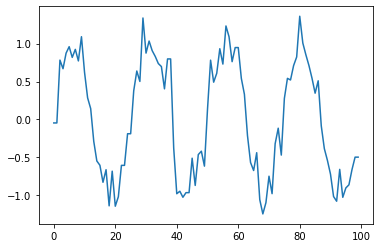

In [5]:
# импортируем библиотеку для создания шума
import random
# библиотека для визуализации
import matplotlib.pyplot as plt

# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None

# создадим датафрейм из списка а, он содержит пропуски
df = pd.DataFrame({'target':a})

df = df.fillna(method='ffill') # метод заполнения назад

# отобразим
plt.plot(df.target.values)

In [40]:
# то, что будет до (графики могут незначительно отличаться)

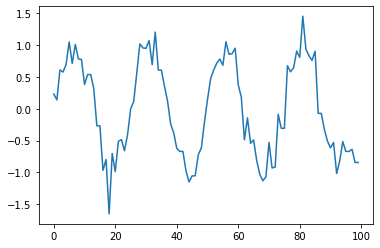

In [0]:
# после (графики могут незначительно отличаться)

## Задание 5

Имеется небольшой игрушечный датафрейм, в котором необходимо провести несколько типов фильтраций (ответы ищите в решениях) и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:

* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [4]:
# создадим тестовый датасет

df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])


print(df[df[df.columns[1]] > 40]) # старше 40
print()
print(df[df[df.columns[2]] > df[df.columns[2]].mean()]) # средний доход=97500.0
print()
print(df[df[df.columns[2]] > df[df.columns[2]].mean()][df[df.columns[3]] < df[df.columns[3]].mean()]) # доход выше среднего, надежнсоть меньше
print()
df['важность клиента']=df[df.columns[2]] * df[df.columns[3]]
df['возможная долгосрочность клиента']=df[df.columns[5]]*(df[df.columns[1]].mean() - df[df.columns[1]])
print(df)
print()
df.rename(columns={'важность клиента': 'важность', 'возможная долгосрочность клиента': 'долгосрочность', 'надежность клиента (0..1)': 'надежность'}, inplace=True)
print(df) # просто

    имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж
2   Аня       41  150000                       0.87  жен

    имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж
2   Аня       41  150000                       0.87  жен

    имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж

     имя  возраст   доход  надежность клиента (0..1)  пол  важность клиента  \
0   Петя       45  100000                       0.65  муж           65000.0   
1   Вася       26   80000                       0.74  муж           59200.0   
2    Аня       41  150000                       0.87  жен          130500.0   
3  Света       21   60000                       0.68  жен           40800.0   

   возможная долгосрочность клиента  
0                         -763750.0  
1                          429200.0  
2                        -10113

c:\users\korowood\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


## Задание 6

Используя материалы блока Exploratory data analysis материалов 2го модуля вывести имена всех выживших детей (до 18 лет) и их количество

Изначальный код:

data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

data.head()

In [5]:
data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [6]:

# отображаем количество выживших детей

print(len(data[data['Age'] < 18][data["Survived"] == 1]))


65


c:\users\korowood\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# отображаем их имена

print(data[data['Age'] < 18]["Name"][data["Survived"] == 1])

9           Mrs. Nicholas (Adele Achem) Nasser
10              Miss. Marguerite Rut Sandstrom
22                          Miss. Anna McGowan
39                  Miss. Jamila Nicola-Yarred
42     Miss. Simonne Marie Anne Andree Laroche
                        ...                   
826     Mrs. Antoni (Selini Alexander) Yasbeck
827             Master. George Sibley Richards
849                   Miss. Mary Conover Lines
865             Master. Harold Theodor Johnson
871                   Miss. Adele Kiamie Najib
Name: Name, Length: 65, dtype: object
